# Análise da progressão da vacinação contra COVID-19 ao redor do mundo

#### Os dados que serão trabalhados nessa análise foram retirados da plataforma Kaggle: https://www.kaggle.com/gpreda/covid-world-vaccination-progress e são baseados em coletas feitas pelo Our World in Data

#### Importando as bibliotecas necessárias para a análise

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

#### Lendo o arquivo csv e analisando-o em formato de DataFrame

In [2]:
data_df = pd.read_csv("country_vaccinations.csv")
data_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://tolonews.com/index.php/health-170355
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://tolonews.com/index.php/health-170355
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://tolonews.com/index.php/health-170355
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://tolonews.com/index.php/health-170355
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://tolonews.com/index.php/health-170355


### Quais vacinas são usadas em cada País?

In [3]:
desired_features = ['total_vaccinations','total_vaccinations_per_hundred','daily_vaccinations','daily_vaccinations_per_million',
        'people_vaccinated','people_vaccinated_per_hundred','people_fully_vaccinated', 'people_fully_vaccinated_per_hundred']
country_vaccine = data_df.groupby(["country", "iso_code", "vaccines"])[desired_features].max().reset_index()
country_vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Daily vaccinations per hundred", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           'People fully vaccinated', 'People fully vaccinated percent']
country_vaccine.head()

,Country,iso_code,Vaccines,Total vaccinations,Daily vaccinations per hundred,Daily vaccinations,Daily vaccinations per million,People vaccinated,People vaccinated per hundred,People fully vaccinated,People fully vaccinated percent
0,Afghanistan,AFG,Oxford/AstraZeneca,8200.0,0.02,1367.0,35.0,8200.0,0.02,NaN,NaN
1,Albania,ALB,Pfizer/BioNTech,33369.0,1.16,1679.0,583.0,6073.0,0.21,655.0,0.02
2,Algeria,DZA,Sputnik V,75000.0,0.17,3748.0,85.0,NaN,NaN,NaN,NaN
3,Andorra,AND,Pfizer/BioNTech,4914.0,6.36,264.0,3417.0,3650.0,4.72,1264.0,1.64
4,Angola,AGO,Oxford/AstraZeneca,6169.0,0.02,2056.0,63.0,6169.0,0.02,NaN,NaN


#### Gerando um esquema de vacinas e indicando qual país a utiliza

In [4]:
vaccines = country_vaccine.Vaccines.unique()
list_countries = []
for v in vaccines:
  countries = country_vaccine.loc[country_vaccine.Vaccines == v, 'Country'].values
  print(f'Vacinas: {v}: \nPaises: {list(countries)}\n')

Vacinas: Oxford/AstraZeneca: 
Paises: ['Afghanistan', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Bangladesh', 'Barbados', 'Belize', "Cote d'Ivoire", 'Dominica', 'Dominican Republic', 'El Salvador', 'Falkland Islands', 'Ghana', 'Grenada', 'Guyana', 'Jamaica', 'Kenya', 'Malawi', 'Maldives', 'Mauritius', 'Moldova', 'Mongolia', 'Montserrat', 'Myanmar', 'Nepal', 'Nigeria', 'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia', 'Sri Lanka', 'Trinidad and Tobago', 'Uganda', 'Ukraine', 'Vietnam']

Vacinas: Pfizer/BioNTech: 
Paises: ['Albania', 'Andorra', 'Bermuda', 'Cayman Islands', 'Costa Rica', 'Croatia', 'Cyprus', 'Ecuador', 'Gibraltar', 'Greenland', 'Guernsey', 'Japan', 'Kuwait', 'Lebanon', 'Malaysia', 'Malta', 'Monaco', 'New Zealand', 'Panama', 'Qatar', 'Singapore', 'Slovakia', 'Turks and Caicos Islands']

Vacinas: Sputnik V: 
Paises: ['Algeria', 'Belarus', 'Bolivia', 'Iran', 'Kazakhstan', 'Paraguay', 'San Marino', 'Tunisia', 'Venezuela']

Vacinas: Oxford/AstraZeneca, Sinopharm/Beijin

### Qual grupo de Vacinas é o mais utilizado?

In [5]:
scheme_vaccines = data_df.groupby(['vaccines','country'])['total_vaccinations'].max().reset_index()
scheme_vaccines.head()

,vaccines,country,total_vaccinations
0,"Covaxin, Oxford/AstraZeneca",India,37143255.0
1,"EpiVacCorona, Sputnik V",Russia,7818009.0
2,Johnson&Johnson,South Africa,168413.0
3,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,113037627.0
4,Moderna,Guatemala,48130.0


In [6]:
sum_scheme_vaccines = scheme_vaccines.groupby(['vaccines'])['total_vaccinations'].sum().reset_index()
sum_scheme_vaccines.sort_values('total_vaccinations', ascending=False, inplace=True)
sum_scheme_vaccines.head()


,vaccines,total_vaccinations
3,"Johnson&Johnson, Moderna, Pfizer/BioNTech",113037627.0
22,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",64980000.0
10,"Oxford/AstraZeneca, Pfizer/BioNTech",59158813.0
6,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",51879395.0
0,"Covaxin, Oxford/AstraZeneca",37143255.0


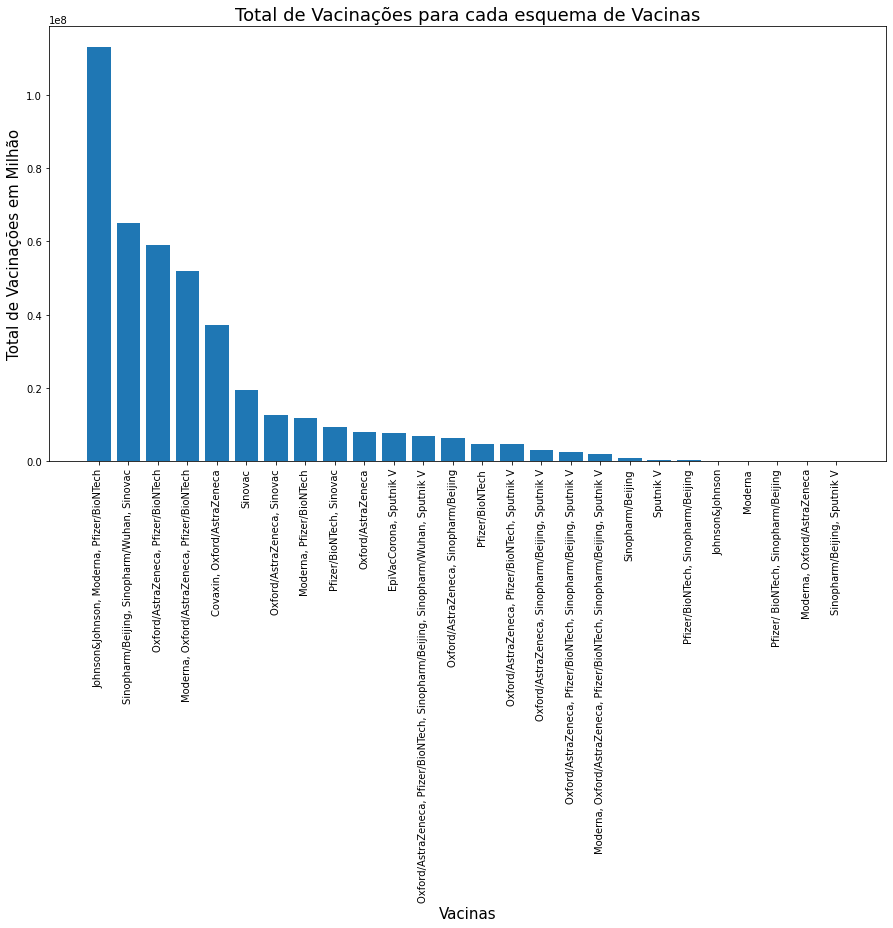

In [7]:
fig = plt.figure(figsize=(15,8))
plt.bar(x=sum_scheme_vaccines['vaccines'], height=sum_scheme_vaccines['total_vaccinations'])
plt.xticks(rotation='vertical')
plt.title('Total de Vacinações para cada esquema de Vacinas', fontsize=18)
plt.xlabel('Vacinas', fontsize=15)
plt.ylabel('Total de Vacinações em Milhão', fontsize=15)
plt.show()


### Quantidade da População Vacinada por País (20 primeiro países com maior qtd de vacinação)

In [8]:
amount_vaccinated = data_df.groupby(['country'])['total_vaccinations'].max().reset_index()
amount_vaccinated.sort_values('total_vaccinations', ascending=False, inplace=True)
amount_vaccinated.head()

,country,total_vaccinations
137,United States,113037627.0
25,China,64980000.0
57,India,37143255.0
136,United Kingdom,27032671.0
38,England,22717791.0


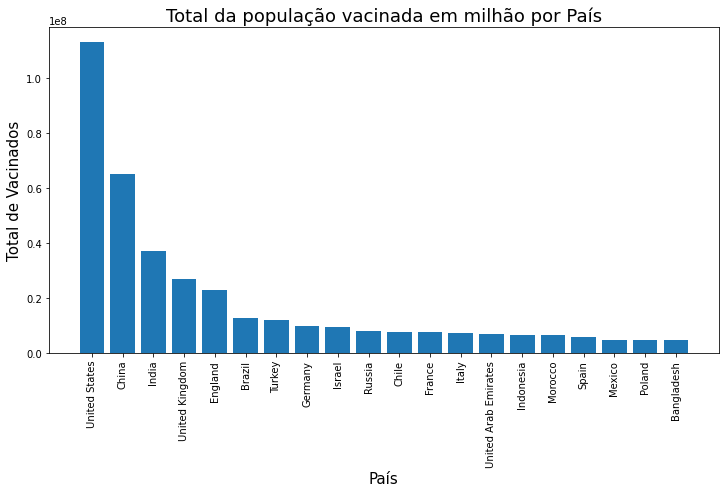

In [9]:
plt.figure(figsize=(12,6))
plt.bar(amount_vaccinated['country'].iloc[:20], amount_vaccinated['total_vaccinations'].iloc[:20])
plt.title('Total da população vacinada em milhão por País', fontsize=18)
plt.xlabel('País', fontsize=15)
plt.ylabel('Total de Vacinados', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

#### A partir do gráfico anterior é possível notar o total da população vacinada nos 20 países com maior total, entretanto esse dado não necessariamente indica qual o país que está vacinando mais rápido sua população, pois é necessário levar em conta a quantidade de habitantes de cada localidade.

### Quantidade da População Vacinada para cada 100 habitantes por País (20 primeiro países com maior qtd de vacinação para cada 100 habitantes)

In [10]:
amount_vaccinated_per_hundred = country_vaccine.groupby(['Country'])['People vaccinated per hundred'].max().reset_index()
amount_vaccinated_per_hundred.sort_values('People vaccinated per hundred', ascending=False, inplace=True)
amount_vaccinated_per_hundred.head()

,Country,People vaccinated per hundred
46,Gibraltar,88.30
118,Seychelles,63.11
62,Israel,59.54
110,Saint Helena,51.18
41,Falkland Islands,49.73


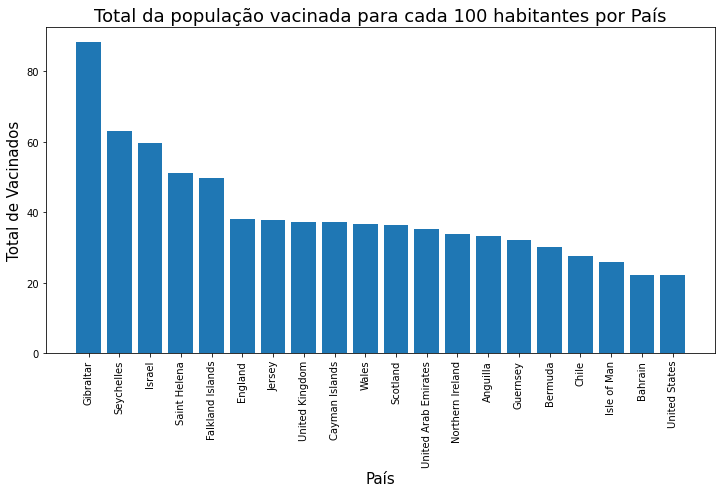

In [11]:
plt.figure(figsize=(12,6))
plt.bar(amount_vaccinated_per_hundred['Country'].iloc[:20], amount_vaccinated_per_hundred['People vaccinated per hundred'].iloc[:20])
plt.title('Total da população vacinada para cada 100 habitantes por País', fontsize=18)
plt.xlabel('País', fontsize=15)
plt.ylabel('Total de Vacinados', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

#### A partir do gráfico anterior é possível entender melhor a velocidade de vacinação de sua população por país, pois fazendo a relação de vacinação por 100 habitantes é tirado o viés da quantidade de acordo com o tamanho populacional.

### Evolução da Vacinação nos Países ao longo do tempo

In [12]:
country_vaccine_time = data_df[['country', 'vaccines', 'date', 'total_vaccinations', 
                                'total_vaccinations_per_hundred', 'daily_vaccinations']].dropna()
country_vaccine_time.sort_values(by = 'date',inplace=True)
country_vaccine_time['date'] = pd.to_datetime(country_vaccine_time['date'])
country_vaccine_time.head()

,country,vaccines,date,total_vaccinations,total_vaccinations_per_hundred,daily_vaccinations
1085,Canada,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2020-12-15,723.0,0.00,718.0
1086,Canada,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2020-12-16,3023.0,0.01,1509.0
1087,Canada,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2020-12-17,7202.0,0.02,2399.0
1088,Canada,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2020-12-18,11174.0,0.03,2792.0
1089,Canada,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2020-12-19,11894.0,0.03,2378.0


In [13]:
country_vaccine_time.dtypes

country                                   object
vaccines                                  object
date                              datetime64[ns]
total_vaccinations                       float64
total_vaccinations_per_hundred           float64
daily_vaccinations                       float64
dtype: object

#### Foi decidido que os 5 países com maior número de casos ao redor do mundo serão os selecionados para a análise da evolução da vacinação

In [15]:
selected_countries = ['United Kingdom', 'United States', 'Russia', 'India', 'Brazil']
markers = {'United Kingdom': 'x', 'United States': 'v', 'Russia': 'o', 'India': 's', 'Brazil': 'd'}

In [16]:
def plot_time_variation(country_vaccine_time, feature, title, countries):
    fig = plt.figure(figsize=(15,8))
    
    for country in selected_countries:
        df = country_vaccine_time.loc[country_vaccine_time.country == country]
        plt.scatter(df['date'], df[feature], marker=markers[country])
        
    plt.title(title, fontsize=25, pad=15)
    plt.xlabel('Data', fontsize=15)
    plt.ylabel(feature, fontsize=15)
    plt.tick_params(labelsize=15)
    plt.legend(selected_countries, fontsize=20)
    plt.grid()


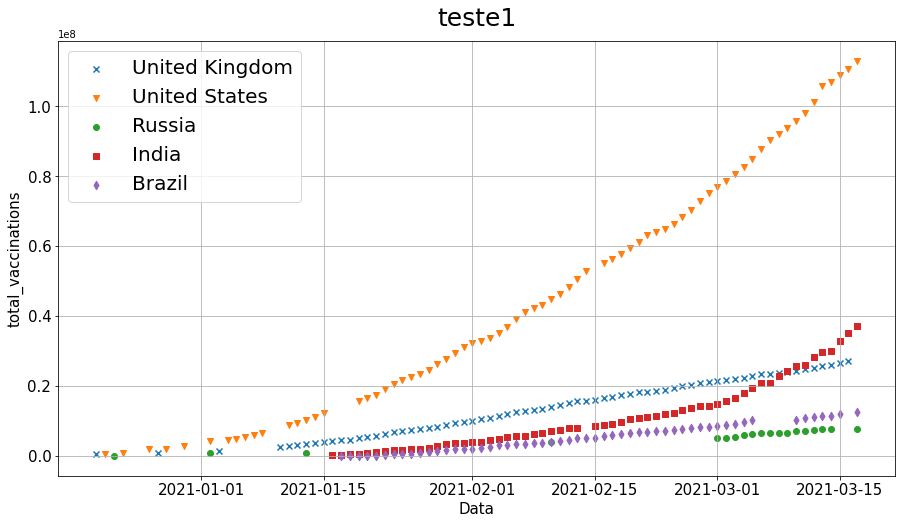

In [17]:
plot_time_variation(country_vaccine_time, 'total_vaccinations', 'teste1', selected_countries)

#### A partir do gráfico anterior nota-se que os Estados Unidos demonstram uma maior crescente no total de vacinação de sua população, tendo a maior evolução ao longo do tempo em relação aos 5 países com mais número de casos registrados.

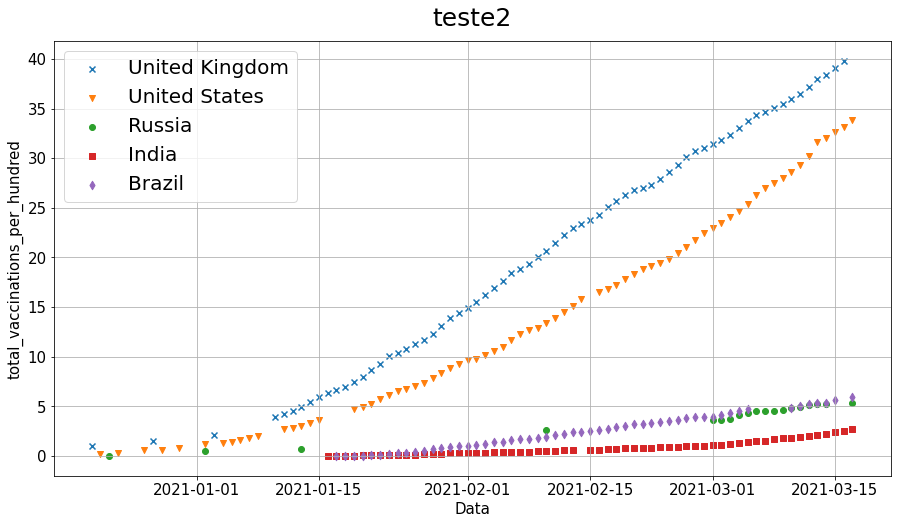

In [18]:
plot_time_variation(country_vaccine_time, 'total_vaccinations_per_hundred', 'teste2', selected_countries)

#### Quando se faz a análise da evolução em relação a vacinação por cada 100 habitantes nota-se que o Reino Unido está vacinando mais rápido a sua população do que os Estados Unidos, e que a India, que estava em segunda colocada em maior número de vacinados de acordo com o gráfico anterior, indica que sua velocidade de vacinação é a menor em relação aos 5 países.

### Evolução da vacinação no brasil

In [19]:
brazil_vaccine_time = data_df[['country', 'vaccines', 'date', 'total_vaccinations', 
                                'total_vaccinations_per_hundred']].dropna()
brazil_vaccine_time.sort_values(by = 'date',inplace=True)
brazil_vaccine_time['date'] = pd.to_datetime(country_vaccine_time['date'])
brazil_vaccine_time = country_vaccine_time.loc[country_vaccine_time.country == 'Brazil']
brazil_vaccine_time.head()

,country,vaccines,date,total_vaccinations,total_vaccinations_per_hundred,daily_vaccinations
910,Brazil,"Oxford/AstraZeneca, Sinovac",2021-01-17,112.0,0.00,112.0
911,Brazil,"Oxford/AstraZeneca, Sinovac",2021-01-18,1109.0,0.00,554.0
912,Brazil,"Oxford/AstraZeneca, Sinovac",2021-01-19,11470.0,0.01,3823.0
913,Brazil,"Oxford/AstraZeneca, Sinovac",2021-01-20,28543.0,0.01,7136.0
914,Brazil,"Oxford/AstraZeneca, Sinovac",2021-01-21,136519.0,0.06,27304.0


In [20]:
brazil_vaccine_time.dtypes

country                                   object
vaccines                                  object
date                              datetime64[ns]
total_vaccinations                       float64
total_vaccinations_per_hundred           float64
daily_vaccinations                       float64
dtype: object

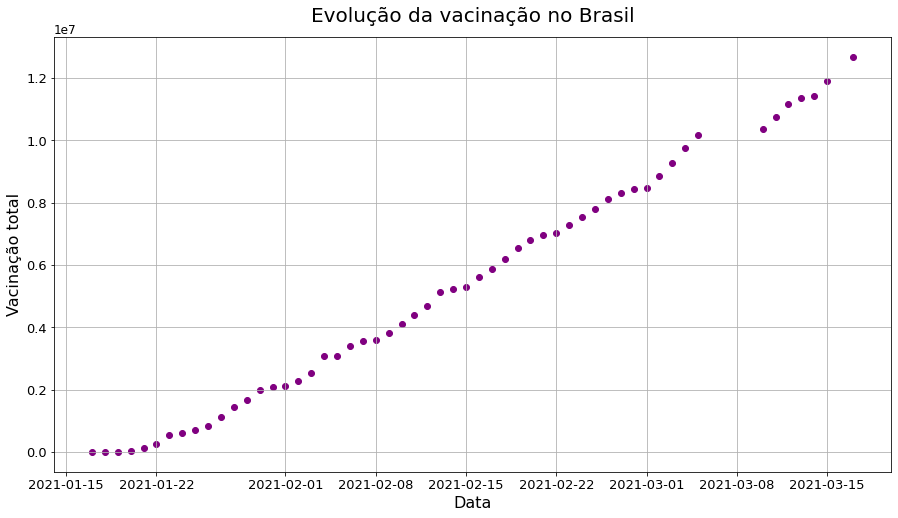

In [27]:
fig = plt.figure(figsize=(15,8))  
plt.scatter(brazil_vaccine_time['date'], brazil_vaccine_time['total_vaccinations'], color = 'purple')     
plt.title('Evolução da vacinação no Brasil', fontsize=20, pad=15)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Vacinação total', fontsize=16)
plt.tick_params(labelsize=13)
plt.grid()


### Porcentagem da população vacinada

#### De acordo com https://www.ibge.gov.br/ a população brasileira ultrapassa os 212,84 milhões habitantes

In [22]:
brazil_population = 212840000

In [23]:
total_brazil_vaccination = country_vaccine[country_vaccine['Country'] == 'Brazil']['Total vaccinations']
total_brazil_vaccination

19    12682290.0
Name: Total vaccinations, dtype: float64

In [24]:
brazil_vaccination_and_population=[brazil_population, total_brazil_vaccination.max()]

Text(0.5, 1.0, 'Porcentagem da população brasileira vacinada')

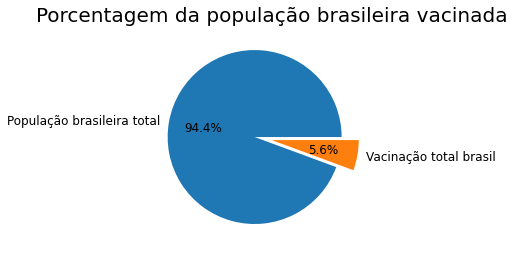

In [25]:
mpl.rcParams['font.size'] = 12
explodir = [0.2, 0]
plt.figure(figsize=(8,4))
plt.pie(brazil_vaccination_and_population, labels =['População brasileira total','Vacinação total brasil'],
        autopct='%.1f%%', explode=explodir)
plt.title('Porcentagem da população brasileira vacinada', fontsize=20, pad=10)